## Tracer channel 

In [1]:
#N = 4 (source, wall, wall, tracer)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pystokes

In [3]:
b = 1    # radius
N = 4    # # particles
eta = 1
wRbm = pystokes.wallBounded.Rbm(b, N, eta)
ff   = pystokes.forceFields.Forces(N)

In [4]:
def tracerTraj(r, F, dt, Nt):    #A function is a block of code which only runs when it is called
    'code to compute tracer velocity'
    v = np.zeros(3*N)
    xt = np.zeros(Nt)
    yt = np.zeros(Nt)
    zt = np.zeros(Nt)
    xt[0] = r[N   - 1]
    yt[0] = r[2*N   - 1]
    zt[0] = r[3*N - 1]

    lje, ljr, wlje, wljr = 1, 2.2, 1, .5   #what is this? 
    for i in range(Nt-1):
        ff.lennardJonesWall(F, r, lje, ljr, wlje, wljr)
        wRbm.mobilityTT(v, r, F)
        xt[i+1] = xt[i] + dt*v[N    - 1]  #x old pos + speed*time at position 
        yt[i+1] = yt[i] + dt*v[2*N   - 1]  
        zt[i+1] = zt[i] + dt*v[3*N - 1]  
        ## force at each time step
        r[N  -1] = xt[i+1]
        r[2*N  -1] = yt[i+1]
        r[3*N -1] = zt[i+1]

        # resettting
        v = v*0
        F = F*0
        F[8], F[9], F[10] =f0, f0, f0   #z component of particle 1
    return xt, yt, zt


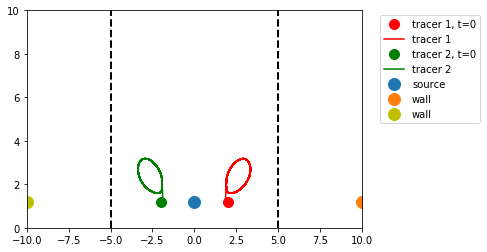

In [5]:
 dt, Nt = 1, 10000
r = np.zeros(3*N)
F = np.zeros(3*N)

wl = 10
# first tracer
h, f0 = 1.2, 10
r[0], r[4], r[8] = 0, 0, h #source particle
r[1], r[5], r[9] = wl, 0, h
r[2], r[6], r[10] = -wl, 0, h
r[3], r[7], r[11] = 2, 0, h #tracer 1 
F[8] = f0 #trap force in z 
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)

#second tracer
h, f0 = 1.2, 10
r[0], r[4], r[8] = 0, 0, h #source particle 
r[1], r[5], r[9] = wl, 0, h 
r[2], r[6], r[10] = -wl, 0, h
r[3], r[7], r[11] = -2, 0, h #tracer 2
F[8], F[9], F[10] = f0, f0, f0
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt) #why does that work? 

## plot

yll = np.linspace(0, 10, 16)
plt.plot(-wl*.5+yll*0, yll, 'k--', lw=2)
plt.plot(wl*.5+yll*0, yll, 'k--', lw=2)

plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0') #circle , ms = marker size 
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[0], r[8], 'o', ms=12, label='source')
plt.plot(r[1], r[9], 'o', ms=12, label ='wall')
plt.plot(r[2], r[10], 'yo', ms=12, label= 'wall')
plt.legend(prop={'size': 8}); plt.ylim([0, 10]); plt.xlim([-10,10])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

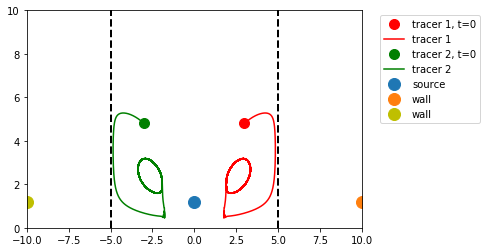

In [6]:
 dt, Nt = 1, 10000
r = np.zeros(3*N)
F = np.zeros(3*N)

wl = 10
# first tracer
h, f0 = 1.2, 10
r[0], r[4], r[8] = 0, 0, h #source particle
r[1], r[5], r[9] = wl, 0, h
r[2], r[6], r[10] = -wl, 0, h
r[3], r[7], r[11] = 3, 0, 4*h #tracer 1 
F[8], F[9], F[10] = f0, f0, f0 #trap force in z 
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)

#second tracer
h, f0 = 1.2, 10
r[0], r[4], r[8] = 0, 0, h #source particle 
r[1], r[5], r[9] = wl, 0, h 
r[2], r[6], r[10] = -wl, 0, h
r[3], r[7], r[11] = -3, 0, 4*h #tracer 2
F[8], F[9], F[10] = f0, f0, f0
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt) #why does that work? 

## plot

yll = np.linspace(0, 10, 16)
plt.plot(-wl*.5+yll*0, yll, 'k--', lw=2)
plt.plot(wl*.5+yll*0, yll, 'k--', lw=2)

plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0') #circle , ms = marker size 
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[0], r[8], 'o', ms=12, label='source')
plt.plot(r[1], r[9], 'o', ms=12, label ='wall')
plt.plot(r[2], r[10], 'yo', ms=12, label= 'wall')
plt.legend(prop={'size': 8}); plt.ylim([0, 10]); plt.xlim([-10,10])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")


In [7]:
##create more particles to enforce the wall throughout z plane? 


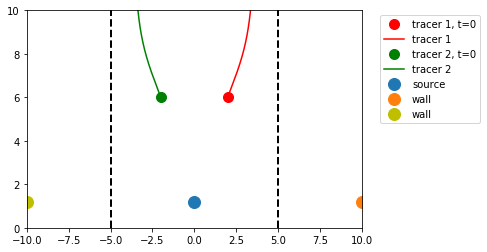

In [8]:
 dt, Nt = 1, 10000
r = np.zeros(3*N)
F = np.zeros(3*N)

wl = 10
# first tracer
h, f0 = 1.2, 10
r[0], r[4], r[8] = 0, 0, h #source particle
r[1], r[5], r[9] = wl, 0, h
r[2], r[6], r[10] = -wl, 0, h
r[3], r[7], r[11] = 2, 0, 5*h #tracer 1 
F[8], F[9], F[10] = f0, f0, f0 #trap force in z 
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)

#second tracer
h, f0 = 1.2, 10
r[0], r[4], r[8] = 0, 0, h #source particle 
r[1], r[5], r[9] = wl, 0, h 
r[2], r[6], r[10] = -wl, 0, h
r[3], r[7], r[11] = -2, 0, 5*h #tracer 2
F[8], F[9], F[10] = f0, f0, f0
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt) #why does that work? 

## plot

yll = np.linspace(0, 10, 16)
plt.plot(-wl*.5+yll*0, yll, 'k--', lw=2)
plt.plot(wl*.5+yll*0, yll, 'k--', lw=2)

plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0') #circle , ms = marker size 
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[0], r[8], 'o', ms=12, label='source')
plt.plot(r[1], r[9], 'o', ms=12, label ='wall')
plt.plot(r[2], r[10], 'yo', ms=12, label= 'wall')
plt.legend(prop={'size': 8}); plt.ylim([0, 10]); plt.xlim([-10,10])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

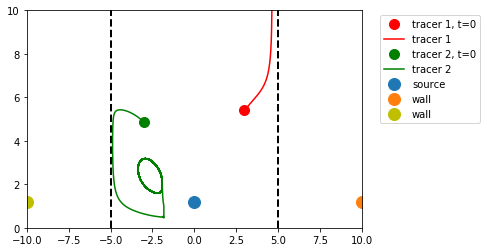

In [9]:
 dt, Nt = 1, 10000
r = np.zeros(3*N)
F = np.zeros(3*N)

wl = 10
# first tracer
h, f0 = 1.2, 10
r[0], r[4], r[8] = 0, 0, h #source particle
r[1], r[5], r[9] = wl, 0, h
r[2], r[6], r[10] = -wl, 0, h
r[3], r[7], r[11] = 3, 0, 4.5*h #tracer 1 
F[8], F[9], F[10] = f0, f0, f0 #trap force in z 
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)

#second tracer
h, f0 = 1.2, 10
r[0], r[4], r[8] = 0, 0, h #source particle 
r[1], r[5], r[9] = wl, 0, h 
r[2], r[6], r[10] = -wl, 0, h
r[3], r[7], r[11] = -3, 0, 4.05*h #tracer 2
F[8], F[9], F[10] = f0, f0, f0
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt) #why does that work? 

## plot

yll = np.linspace(0, 10, 16)
plt.plot(-wl*.5+yll*0, yll, 'k--', lw=2)
plt.plot(wl*.5+yll*0, yll, 'k--', lw=2)

plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0') #circle , ms = marker size 
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[0], r[8], 'o', ms=12, label='source')
plt.plot(r[1], r[9], 'o', ms=12, label ='wall')
plt.plot(r[2], r[10], 'yo', ms=12, label= 'wall')
plt.legend(prop={'size': 8}); plt.ylim([0, 10]); plt.xlim([-10,10])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
